Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

In [1]:
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Original data:")
print(data)

print("\nScaled data:")
print(scaled_data)


Original data:
[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

Scaled data:
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

In [2]:
from sklearn.preprocessing import Normalizer
import numpy as np

# Sample data
data = np.array([[1, 2], [2, 4], [3, 6]])

# Create a Normalizer
normalizer = Normalizer()

# Transform the data
normalized_data = normalizer.transform(data)

print("Original data:")
print(data)

print("\nNormalized data:")
print(normalized_data)


Original data:
[[1 2]
 [2 4]
 [3 6]]

Normalized data:
[[0.4472136  0.89442719]
 [0.4472136  0.89442719]
 [0.4472136  0.89442719]]


Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.

Original data shape: (150, 4)
Transformed data shape: (150, 2)
Variance explained by each component: [0.72962445 0.22850762]


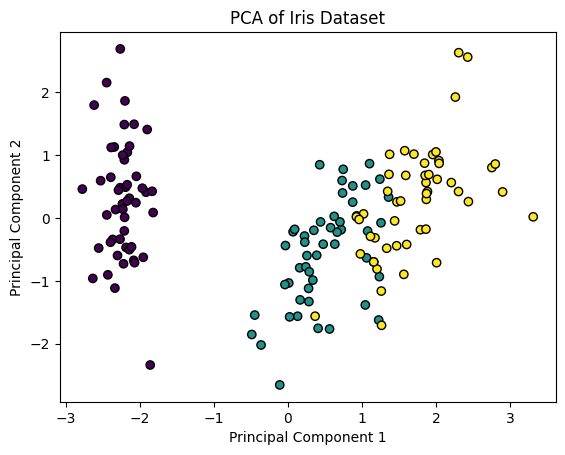

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data (optional, but recommended)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Display the results
print("Original data shape:", X_standardized.shape)
print("Transformed data shape:", X_pca.shape)

# The variance explained by each principal component
print("Variance explained by each component:", pca.explained_variance_ratio_)

# Visualize the transformed data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()


Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

In [5]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import plotly.express as px

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply PCA with 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for Plotly
import pandas as pd
df = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Digit': y})

# Plot using Plotly Express
fig = px.scatter(df, x='PC1', y='PC2', color='Digit', title='PCA: Digits dataset in 2D',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.show()


Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

In [6]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample dataset with features: price, rating, and delivery time
data = {
    'price': [10, 25, 15, 30, 20],
    'rating': [4.5, 3.8, 4.2, 4.9, 3.5],
    'delivery_time': [20, 35, 25, 40, 30]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Display the original and scaled data
print("Original data:")
print(df)
print("\nScaled data:")
print(pd.DataFrame(scaled_data, columns=df.columns))

# Use the scaled data in the recommendation system model (not implemented in this example)
# Your recommendation system logic goes here


Original data:
   price  rating  delivery_time
0     10     4.5             20
1     25     3.8             35
2     15     4.2             25
3     30     4.9             40
4     20     3.5             30

Scaled data:
   price    rating  delivery_time
0   0.00  0.714286           0.00
1   0.75  0.214286           0.75
2   0.25  0.500000           0.25
3   1.00  1.000000           1.00
4   0.50  0.000000           0.50


Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset (replace 'stock_data.csv' with your actual dataset)
data = pd.read_csv('stock_data.csv')

# Separate features (X) and target variable (y)
X = data.drop('StockPrice', axis=1)  # Assuming 'StockPrice' is the target variable
y = data['StockPrice']

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_standardized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Build a regression model (replace with your preferred model)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Save the PCA model for transforming future data
import joblib
joblib.dump(pca, 'pca_model.pkl')


Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Original dataset
data = [1, 5, 10, 15, 20]

# Reshape the data as MinMaxScaler expects a 2D array
data = [[value] for value in data]

# Create a MinMaxScaler with the desired range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Extract the scaled values
scaled_values = [value[0] for value in scaled_data]

print("Original data:", data)
print("Scaled data (in the range -1 to 1):", scaled_values)


Original data: [[1], [5], [10], [15], [20]]
Scaled data (in the range -1 to 1): [-0.9999999999999999, -0.5789473684210525, -0.05263157894736836, 0.47368421052631593, 1.0]


Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?

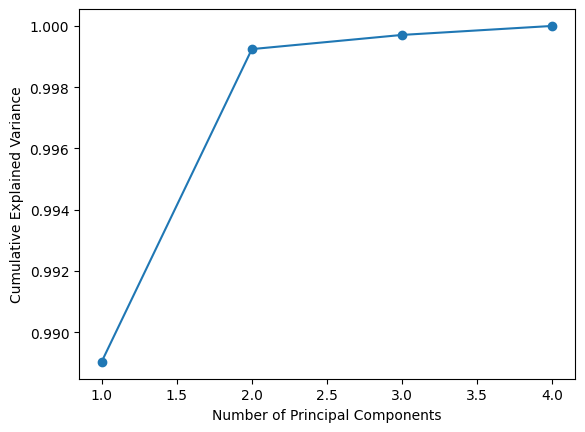

Number of principal components to retain: 4

Original data:
   height  weight  age  blood_pressure
0     160      60   25             120
1     175      75   30             130
2     155      55   22             115
3     180      85   35             140
4     170      70   28             125

Standardized data:
     height    weight       age  blood_pressure
0 -0.862662 -0.842927 -0.677631       -0.697486
1  0.754829  0.561951  0.451754        0.464991
2 -1.401826 -1.311220 -1.355262       -1.278724
3  1.293993  1.498537  1.581139        1.627467
4  0.215666  0.093659  0.000000       -0.116248

Principal components:
        PC1       PC2       PC3       PC4
0 -1.540094  0.152930  0.069805 -0.015276
1  1.115976 -0.240327 -0.008798 -0.051162
2 -2.673248  0.079040 -0.061463  0.001667
3  3.001310  0.245836 -0.016187  0.010947
4  0.096056 -0.237479  0.016643  0.053825


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create a synthetic dataset
data = {
    'height': [160, 175, 155, 180, 170],
    'weight': [60, 75, 55, 85, 70],
    'age': [25, 30, 22, 35, 28],
    'gender': ['Male', 'Male', 'Female', 'Male', 'Female'],
    'blood_pressure': [120, 130, 115, 140, 125]
}

# Convert the dataset to a DataFrame
df = pd.DataFrame(data)

# Separate features (X) and target variable (y)
X = df.drop('gender', axis=1)  # Exclude 'gender' as it is categorical
y = df['gender']

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Analyze Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_

# Plot Cumulative Explained Variance
cum_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the Number of Components
desired_variance_threshold = 0.95
num_components_to_retain = (cum_explained_variance >= desired_variance_threshold).sum()

print(f"Number of principal components to retain: {num_components_to_retain}")

# Extract the top principal components
X_top_components = X_pca[:, :num_components_to_retain]

# Display the results
print("\nOriginal data:")
print(X)
print("\nStandardized data:")
print(pd.DataFrame(X_standardized, columns=X.columns))
print("\nPrincipal components:")
print(pd.DataFrame(X_top_components, columns=[f'PC{i+1}' for i in range(num_components_to_retain)]))
